In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import pandas as pd
import pandas as pd
import numpy as np
from scipy.interpolate import griddata
from astropy import units as u
from astropy import constants as c

/Users/haoyushen/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
file_path = "/Users/haoyushen/Desktop/research UTD Tidal Dissipation /data/data from new catalouge of EBs.tsv"   # adjust as needed
df = pd.read_csv(
    file_path,
    sep="|",
    engine="python",
    comment="#",
    na_values=["", "na", "null"]
)
df = df.fillna(0)

print(df.head())
print(df.columns)

   Seq           Name           T0 n_T0      e_T0           Ps         e_Ps  \
0                                d              d            d            d   
1  ---  -------------  -----------    -  --------  -----------  -----------   
2    1  BW Aqr         44545.52150        0.00060   6.71969500                
3    2  V871 Aql       38637.14890        0.00090   2.95266980   0.00000120   
4    3  V889 Aql       38241.74390        0.00060  11.12079370   0.00000250   

            Pa         e_Pa l_e  ...     HIP      RAJ2000      DEJ2000    mag  \
0            d            d      ...                h:m:s        d:m:s    mag   
1  -----------  -----------   -  ...  ------  -----------  -----------  -----   
2   6.71971200   0.00000300      ...  110514  22 23 15.94  -15 19 56.1  10.86   
3   2.95276330   0.00000120      ...          18 42 39.40  -03 09 28.0  13.30   
4  11.12080760   0.00000250      ...          19 18 49.80  +16 15 00.0   8.52   

    Dmag Filt            SpType       

In [3]:
base = '/Users/haoyushen/Desktop/research UTD Tidal Dissipation /data'

iso_df = pd.read_csv(f'{base}/isochrone table.csv')

raw = pd.read_csv(
    f'{base}/data from new catalouge of EBs.tsv',
    sep='|',
    comment='#',
    engine='python'
)

df = raw.drop(index=0).reset_index(drop=True)

for col in ['T1','T2','logg1','logg2']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# compute log10 temperatures
df['logT1'] = np.log10(df['T1'])
df['logT2'] = np.log10(df['T2'])

# coerce the isochrone grid columns to numeric as well
for col in ['logg','logTe','logAge','MH']:
    iso_df[col] = pd.to_numeric(iso_df[col], errors='coerce')

# build interpolation arrays from the full grid
pts      = iso_df[['logg','logTe']].dropna().values
age_vals = iso_df.dropna(subset=['logg','logTe','logAge'])['logAge'].values
mh_vals  = iso_df.dropna(subset=['logg','logTe','MH'])['MH'].values

# query points from your catalogue (T1 & T2 pairs)
orig1 = df[['logg1','logT1']].values
orig2 = df[['logg2','logT2']].values

# do the interpolation
df['logAge_interp_1'] = griddata(pts, age_vals, orig1, method='linear')
df['logAge_interp_2'] = griddata(pts, age_vals, orig2, method='linear')
df['MH_interp_1']     = griddata(pts, mh_vals,  orig1, method='linear')
df['MH_interp_2']     = griddata(pts, mh_vals,  orig2, method='linear')

# average the two estimates
df['logAge'] = df[['logAge_interp_1','logAge_interp_2']].mean(axis=1)
df['MH']     = df[['MH_interp_1','MH_interp_2']].mean(axis=1)


In [4]:
#Strings to numeric number
for col in ["U", "Ps", "e_Ps", "e", "e_e","e_U",'M1', 'e_M1', 'M2', 'e_M2','MH','logAge','R1','R2','logk2']:
    df[col] = pd.to_numeric(df[col], errors="coerce")   # bad entries → NaN
df.dropna()

,Seq,Name,T0,n_T0,e_T0,Ps,e_Ps,Pa,e_Pa,l_e,...,Ref1,Simbad,logT1,logT2,logAge_interp_1,logAge_interp_2,MH_interp_1,MH_interp_2,logAge,MH
4,4,V539 Ara,45056.74590,,0.00070,3.169085,1.200000e-06,3.16925520,0.00000120,,...,1,Simbad,4.258038,4.232996,8.004320,8.158339,-1.649236,-1.276044,8.081329,-1.462640
20,20,OX Cas,46733.78990,,0.00250,2.489345,3.600000e-05,2.48980700,0.00002500,,...,1,Simbad,4.380211,4.372912,7.235671,7.269738,-0.473179,-0.617340,7.252705,-0.545260
22,22,PV Cas,40227.38740,,0.00030,1.750470,1.400000e-07,1.75055992,0.00000014,,...,3,Simbad,4.008089,4.008813,8.559755,8.596750,-0.142456,-0.207373,8.578253,-0.174915
28,28,V346 Cen,44650.36460,,0.00630,6.321916,2.000000e-06,6.32236800,0.00001500,,...,3,Simbad,4.423246,4.380211,6.895236,6.000000,-0.502146,0.671993,6.447618,0.084924
32,32,CW Cep,41669.57260,,0.00080,2.729140,1.800000e-07,2.72958580,0.00000038,,...,"1, 3",Simbad,4.451786,4.433386,6.107660,6.270825,0.577334,0.385115,6.189243,0.481224
33,33,EK Cep,42624.65900,,0.00030,4.427796,3.000000e-06,4.42780620,0.00000050,,...,1,Simbad,3.954001,3.755112,8.923332,8.672248,-0.656047,0.516504,8.797790,-0.069771
37,37,TV Cet,41685.58390,,0.00030,9.103287,8.000000e-08,9.10329452,0.00000080,,...,1,Simbad,3.845098,3.820201,8.239297,8.629727,0.417532,0.124228,8.434512,0.270880
40,40,Y Cyg,42577.80640,,0.00060,2.996846,2.000000e-05,2.99633200,0.00003000,,...,"1, 3",Simbad,4.491362,4.499275,6.000000,6.000000,0.452178,0.237396,6.000000,0.344787
42,42,V380 Cyg,41256.54400,,0.00600,12.425719,1.400000e-05,12.42600100,,,...,"1, 3",Simbad,4.329398,4.311754,7.229163,6.120075,-1.606565,0.533783,6.674619,-0.536391
43,43,V453 Cyg,39340.09980,,0.00190,3.889825,1.800000e-05,3.89045000,0.00001700,,...,3,Simbad,4.424882,4.406540,6.928725,6.949849,-0.553626,-0.297691,6.939287,-0.425658


In [5]:
#Get semimajoraxis from Kepler's Law
def semimajoraxis(M1, M2, Ps):
    a = (c.G*(M1+M2)*Ps**2/(4*np.pi**2))**(1/3)
    return a

In [6]:
#classical relativistic term (eq.3)
def PU_rel(M1,M2,a,e):
    P_Urel = (3*c.G*(M1+M2)) / (c.c**2 * a * (1 - e**2))
    return P_Urel

In [7]:
#Reverse the order of mass and radius for different star in a system and add them up
#tidal contribution (eq.7–10)
def P_Utide(M1, M2, e, R, k2, a):
    f_e = (1 + 1.5*e**2 + 0.125*e**4) / (1 - e**2)**5
    Ct = (R/a)**5 * (M2/M1) * 15 * f_e
    return k2*Ct

In [8]:
#net rotational term P/U_rot  (eq.13)
def P_Urot(P, U, P_Urel, P_Utide):
    P_Uobs = P / U
    P_Urot = P_Uobs - P_Urel - P_Utide
    return P_Urot

In [9]:
#apsidal‐motion coefficients Ai (eq.12 & 14)
#Again, Reverse the order of mass and radius for different star in a system and add them up
def apsidal_motion_coeff(k2, e, R, M1, M2):
    g_e = (1 - e**2)**(-2)
    return k2 * (R/a)**5 * (1 + M2/M1) * g_e

In [10]:
#x components
def x_sys(P_Urot, A_sum, M2, M1, R1, a):
    Z = P_Urot / A_sum
    mask2 = (Z > 0) & np.isfinite(Z)
    Z = Z[mask2]
    E2 = 1.0
    β = 0.1
    q1 = M2/M1
    tsyn1 = (1.0 /((525/3)*q1**2*(1+q1)**(5/6)*E2)* np.sqrt(R1**3/(c.G*M1))*β**2*(a/R1)**(17/2))
    return (age[mask2] / tsyn1[mask2])

In [11]:
#y components
def w_rsyn(P_Urot, A_sum, e, P):
    Z = P_Urot / A_sum
    mask2 = (Z > 0) & np.isfinite(Z)
    Z = Z[mask2]
    wk = 2*np.pi / P[mask2]
    wsyn = wk * ((1+1.5*e[mask2]**2+0.625*e[mask2]**4)/((1+3*e[mask2]**2+0.375*e[mask2]**4)*(1-e[mask2]**2)**1.5))
    wr_ok = np.sqrt(Z)
    return wr_ok / (wsyn/wk)

In [12]:
#Set up
req = ['M1','M2','R1','R2','Ps','U','e','logAge','logk2']
dfc = df.dropna(subset=req)
mask = ((dfc['M1']>0)&(dfc['M2']>0)&(dfc['R1']>0)&(dfc['R2']>0)&(dfc['Ps']>0)&(dfc['U']>0)&
        (dfc['e']>=0)&(dfc['e']<1))
dfc = dfc[mask].reset_index(drop=True)

In [13]:
M1 = dfc['M1'].to_numpy()
M2 = dfc['M2'].to_numpy()
R1 = dfc['R1'].to_numpy()
R2 = dfc['R2'].to_numpy()
P  = dfc['Ps'].to_numpy()
U  = dfc['U'].to_numpy()
e  = dfc['e'].to_numpy()
age= 10**dfc['logAge']*u.yr
k2 = (10**dfc['logk2']).values

In [14]:
a = semimajoraxis(M1*u.M_sun, M2*u.M_sun, P*u.day)
PUrel = PU_rel(M1*u.M_sun, M2*u.M_sun, a, e).to_value('')
PUtide = (P_Utide(M1*u.M_sun, M2*u.M_sun, e, R1*u.R_sun, k2, a)+P_Utide(M2*u.M_sun, 
                                                                               M1*u.M_sun, e, R2*u.R_sun, k2,
                                                                               a)).to_value('')
PUrot = P_Urot(P*u.day, U*u.year, PUrel, PUtide).to_value('')
A_sum = (apsidal_motion_coeff(k2, e, R1*u.R_sun, M1*u.M_sun, M2*u.M_sun)+apsidal_motion_coeff(k2, e, R2*u.R_sun, 
                                                                                             M2*u.M_sun, 
                                                                                             M1*u.M_sun)).to_value('')
xsys = x_sys(PUrot, A_sum, M2*u.M_sun, M1*u.M_sun, R1*u.R_sun, a).values
wrsyn = w_rsyn(PUrot, A_sum, e, P*u.day).to_value('')

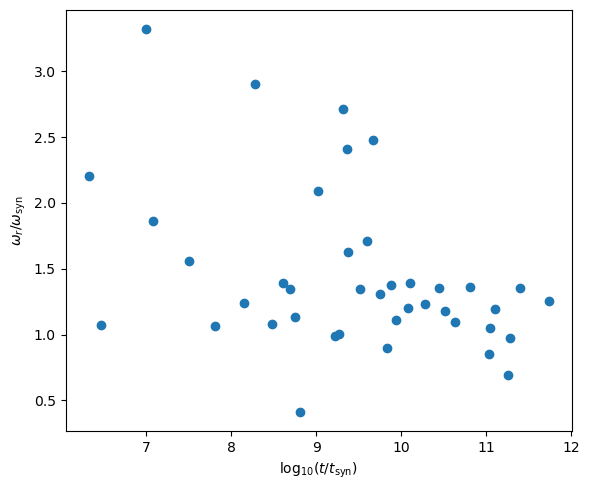

In [15]:
#generate the plot
plt.figure(figsize=(6,5))
plt.scatter(np.log10(xsys), wrsyn)
plt.xlabel(r'$\log_{10}(t / t_{\rm syn})$')
plt.ylabel(r'$\omega_r / \omega_{\rm syn}$')
plt.tight_layout()
plt.show()